#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Aurelio Antonio Lozano Rabago A01081266
* Josias Ruiz Peña A00968460
* David González A01794025
* Jerson David Pérez Contreras A01793810
* Jose Alberto Mtanous Treviño A00169781


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import requests, zipfile
from io import BytesIO

from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix,classification_report, make_scorer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import  cross_validate,  RepeatedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

from sklearn.inspection import permutation_importance


#**Ejercicio-1.** 

In [2]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'
file_name = 'dataset_Facebook.csv'
req = requests.get(path)
zp = zipfile.ZipFile(BytesIO(req.content))
zp.extractall()
miDF = pd.read_csv(file_name, sep=';')
miDF



miDF.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [3]:
#renombramos las columnas
miDF.rename(columns={
    'Page total likes': 'PageTotalLikes',
    'Post Month': 'PostMonth',
    'Post Hour': 'PostHour',
    'Post Weekday': 'PostWeekday',
    'Lifetime People who have liked your Page and engaged with your post':'LPE',
},inplace=True)
miDF.head()

,PageTotalLikes,Type,Category,PostMonth,PostWeekday,PostHour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
miDF.describe()

,PageTotalLikes,Category,PostMonth,PostWeekday,PostHour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Convertimos Type a numerico

In [5]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(miDF['Type'])
 
# printing label
label

array([1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
miDF2=miDF
miDF2['Type']=label
miDF2.head()

,PageTotalLikes,Type,Category,PostMonth,PostWeekday,PostHour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [8]:
miDF2.dropna(subset=['Paid'],inplace = True)

#**Ejercicio-2.**

In [9]:
X = miDF2.loc[:,["Category","PageTotalLikes","Type","PostMonth","PostHour","PostWeekday","Paid"]]
y = miDF2.loc[:,'LPE']

#Realiza una partición de los datos en el conjunto de entrenamiento del 80% y el de prueba de 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=10)

In [10]:
X_train.describe()

,Category,PageTotalLikes,Type,PostMonth,PostHour,PostWeekday,Paid
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.874687,123013.807018,1.065163,7.010025,7.761905,4.110276,0.273183
std,0.859084,16233.796752,0.432086,3.329463,4.287525,2.029399,0.446153
min,1.000000,81370.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,111620.000000,1.000000,4.000000,3.000000,2.000000,0.000000
50%,2.000000,129600.000000,1.000000,7.000000,9.000000,4.000000,0.000000
75%,3.000000,136393.000000,1.000000,10.000000,11.000000,6.000000,1.000000
max,3.000000,139441.000000,3.000000,12.000000,20.000000,7.000000,1.000000


#**Ejercicio-3.**

In [11]:
# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(yreal, ypred):
  RMSE_val=np.square(yreal-ypred)
  RMSE_val=(np.mean(RMSE_val))**.5
  return RMSE_val


# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(yreal, ypred):
  MAE_val=np.abs(yreal-ypred)
  MAE_val=np.mean(MAE_val)
  return MAE_val
  

# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(yreal, ypred):
  MAPE_val = np.abs(((yreal-ypred)/yreal))
  MAPE_val=100*np.mean(MAPE_val)
  return MAPE_val

#**Ejercicio-4.**

In [12]:
df_CategoricalVar = ['Type','Category']
df_CuantitativaVar= ["PageTotalLikes"]
df_OrdinalcVar= ["PostMonth","PostHour","PostWeekday"]
df_BinaryVar= ["Paid"]

#pipeline variables Ordinales
df_PipelineOrd= Pipeline(steps = [('ImpMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(0,1)))])
columnas_PipelineOrd =df_OrdinalcVar

#pipeline variables categoricas
df_PipelineCate = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore",drop='first'))])
columnas_df_PipelineCate = df_CategoricalVar


#pipeline variables binarias
df_PipelineBin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore",drop='first'))])
columnas_df_PipelineBin = df_BinaryVar

#pipeline variables Cuantitativas
df_PipelineCuant = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')), ('scalar', MinMaxScaler(feature_range=(0,1)))])
columnas_df_PipelineCuant = df_CuantitativaVar= ["PageTotalLikes"]

In [13]:
df_ColTransformadas = ColumnTransformer(transformers=[('Numericas', df_PipelineOrd, columnas_PipelineOrd), 
                                            ('Categoricas', df_PipelineCate , columnas_df_PipelineCate),
                                             ('Cuantitativas', df_PipelineCuant , columnas_df_PipelineCuant),
                                            ('binarias', df_PipelineBin, columnas_df_PipelineBin)],
                                            remainder='passthrough')

#**Ejercicio-5.**

In [14]:
mis_metricas = {
      "RMSE": make_scorer(mi_RMSE),
      "MAE":make_scorer(mi_MAE),
      "MAPE": make_scorer(mi_MAPE)
  }


DummyX_train, DummyX_test, Dummyy_train, Dummyy_test = train_test_split(X_train,y_train, test_size=0.25, random_state=0)



In [15]:
dummy_regr = DummyRegressor()
dummy_regr.fit(DummyX_train, Dummyy_train,)


DummyRegressor()

In [16]:
resultadosD = list()

#Kfold validacion cruzada de 5 particiones y 3 repeticiones
kfold = RepeatedKFold(n_splits=3, n_repeats=2)
#en pipeline ponemos las columnas transformadas y los modelos
pipeline = Pipeline(steps=[('ct',df_ColTransformadas),('m',dummy_regr)])
 
resultadosDummy = cross_validate(pipeline, DummyX_train, Dummyy_train, scoring=mis_metricas, cv=kfold, return_train_score=True)
  
resultadosD.append(resultadosDummy)
  
print("Prueba \n") 
print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % ('ModeloDummy',
                                                                          np.mean(resultadosDummy['test_RMSE']), np.std(resultadosDummy['test_RMSE']), 
                                                                          np.mean(resultadosDummy['test_MAE']),np.std(resultadosDummy['test_MAE']), 
                                                                          np.mean(resultadosDummy['test_MAPE']),np.std(resultadosDummy['test_MAPE'])
                                                                          ))
  

print("Entrenamiento \n") 
print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % ('ModeloDummy',
                                                                          np.mean(resultadosDummy['train_RMSE']), np.std(resultadosDummy['train_RMSE']), 
                                                                          np.mean(resultadosDummy['train_MAE']),np.std(resultadosDummy['train_MAE']), 
                                                                          np.mean(resultadosDummy['train_MAPE']),np.std(resultadosDummy['train_MAPE'])))

Prueba 

ModeloDummy:
mean RMSE: 571.724 (102.3390)
mean MAE: 381.968 (37.1987)
mean MAPE: 142.685 (32.8950)

Entrenamiento 

ModeloDummy:
mean RMSE: 574.852 (51.6366)
mean MAE: 380.523 (35.0172)
mean MAPE: 141.332 (11.6703)



#**Ejercicio-6.**
Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con 
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada 
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de 
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor 
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o 
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de 
iteraciones para que todos los modelos converjan.   

In [17]:
#creamos la lista de modelos con sus nombres
def Do_models():
  #listas
  modelos = list()
  nombres = list()

  # Modelo de Regresión Linear:
  modelos.append(LinearRegression())
  nombres.append('RegresionLin')

  # Modelo de Perceptron:
  modelos.append(MLPRegressor(hidden_layer_sizes=(1, 1),     # número de capas ocultas y nodos en cada capa.
                            max_iter=40000,                # máximo número de iteraciones para el proceso de convergencia.
                            alpha=0.001,                  # constante asociado al término de regularización L2.
                            solver='adam',                 # técnica de optimización.
                            learning_rate_init=0.01       # valor inicial del tamaño de paso con relación a "adam" o "sgd".
                            ))
  nombres.append('Perceptron')
  
  #modelo bosque aleatorio
  modelos.append(RandomForestRegressor(max_depth=3,min_samples_split=2,ccp_alpha=0.01))
  nombres.append('BosqueAleatorio')
  
  return modelos, nombres


resultados = list()

In [18]:
#creamos los modelos
modelos, nombres = Do_models()  
modelos

[LinearRegression(),
 MLPRegressor(alpha=0.001, hidden_layer_sizes=(1, 1), learning_rate_init=0.01,
              max_iter=40000),
 RandomForestRegressor(ccp_alpha=0.01, max_depth=3)]

In [19]:
print(X_train)

     Category  PageTotalLikes  Type  PostMonth  PostHour  PostWeekday  Paid
305         3          124940     1          6         2            4   0.0
107         2          136736     2         10         4            1   0.0
350         2          116435     1          5         9            5   0.0
334         2          119198     2          5         2            1   0.0
142         2          136013     2         10         2            3   1.0
..        ...             ...   ...        ...       ...          ...   ...
320         1          123047     1          6        11            3   0.0
15          2          138414     2         12        10            3   0.0
484         3           86491     1          1         7            2   0.0
125         1          136393     1         10         5            7   0.0
265         3          128032     1          7        13            6   1.0

[399 rows x 7 columns]


In [20]:
for i in range(len(modelos)):

#Kfold validacion cruzada de 3 particiones y 2repeticiones
  kfold = RepeatedKFold(n_splits=3, n_repeats=2)
#en pipeline ponemos las columnas transformadas y los modelos
  pipeline = Pipeline(steps=[('ct',df_ColTransformadas),('m',modelos[i])])
 
  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mis_metricas, cv=kfold, return_train_score=True)
  
  resultados.append(resultadosOU)
  
  print("Prueba \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_RMSE']), np.std(resultadosOU['test_RMSE']), 
                                                                          np.mean(resultadosOU['test_MAE']),np.std(resultadosOU['test_MAE']), 
                                                                          np.mean(resultadosOU['test_MAPE']),np.std(resultadosOU['test_MAPE'])
                                                                          ))
  

  print("Entrenamiento \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_RMSE']), np.std(resultadosOU['train_RMSE']), 
                                                                          np.mean(resultadosOU['train_MAE']),np.std(resultadosOU['train_MAE']), 
                                                                          np.mean(resultadosOU['train_MAPE']),np.std(resultadosOU['train_MAPE'])))

Prueba 

RegresionLin:
mean RMSE: 489.730 (95.1889)
mean MAE: 296.473 (38.4350)
mean MAPE: 96.968 (17.4789)

Entrenamiento 

RegresionLin:
mean RMSE: 472.672 (53.5577)
mean MAE: 284.975 (31.8184)
mean MAPE: 91.239 (10.6805)

Prueba 

Perceptron:
mean RMSE: 579.996 (76.7259)
mean MAE: 361.400 (45.9809)
mean MAPE: 120.754 (23.5565)

Entrenamiento 

Perceptron:
mean RMSE: 573.627 (43.7009)
mean MAE: 363.997 (33.5857)
mean MAPE: 121.560 (11.2341)

Prueba 

BosqueAleatorio:
mean RMSE: 531.241 (57.3399)
mean MAE: 314.389 (25.5804)
mean MAPE: 102.075 (22.9724)

Entrenamiento 

BosqueAleatorio:
mean RMSE: 420.215 (32.5308)
mean MAE: 264.663 (19.0390)
mean MAPE: 88.174 (10.6516)



In [21]:
print(modelos)

[LinearRegression(), MLPRegressor(alpha=0.001, hidden_layer_sizes=(1, 1), learning_rate_init=0.01,
             max_iter=40000), RandomForestRegressor(ccp_alpha=0.01, max_depth=3)]


#**Ejercicio-7.**

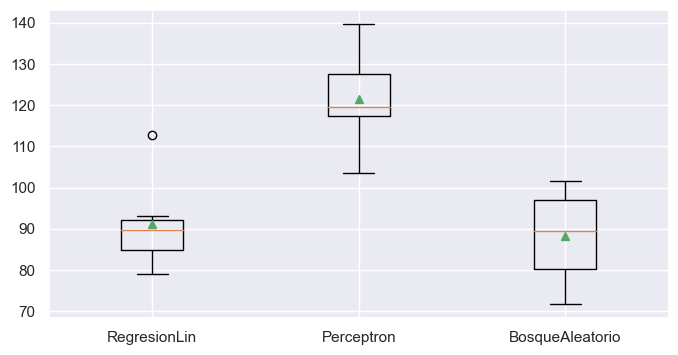

In [22]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,4)})

bpRecallTrain = list()

for i in range(len(resultados)):
  rr = resultados[i]['train_MAPE']
  bpRecallTrain.append(rr)

plt.boxplot(bpRecallTrain, labels=nombres, showmeans=True)
plt.show()

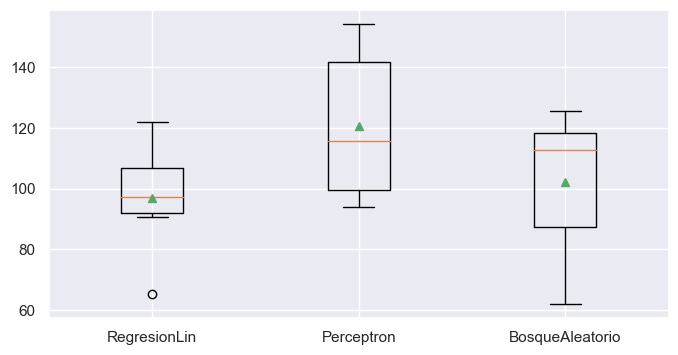

In [23]:

sns.set(rc={'figure.figsize':(8,4)})

bpRecallTest = list()

for i in range(len(resultados)):
  rr = resultados[i]['test_MAPE']
  bpRecallTest.append(rr)

plt.boxplot(bpRecallTest, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores 
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los 
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación 
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [30]:
modeloMLP = MLPRegressor(hidden_layer_sizes=(1, 4),     # número de capas ocultas y nodos en cada capa.
                            max_iter=10000,                # máximo número de iteraciones para el proceso de convergencia.
                            alpha=0.001,                  # constante asociado al término de regularización L2.
                            solver='adam',                 # técnica de optimización.
                            learning_rate_init=0.01       # valor inicial del tamaño de paso con relación a "adam" o "sgd".
                            )
pipeMLP = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modeloMLP)]) 
kfoldMLP = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)  

ParamsMLP = {'model__hidden_layer_sizes':[(1,8), (2,4), (2,8)],
             'model__alpha':[0.01, 0.05, 0.1],
             'model__learning_rate_init':[0.0001, 0.001, 0.01]}

In [31]:
GridMLP = GridSearchCV(pipeMLP,
                        param_grid = ParamsMLP,
                        cv=kfoldMLP,
                        scoring=make_scorer(mi_MAPE),
                        n_jobs=-1)

In [32]:
GridMLP.fit(X_train, np.ravel(y_train))
best_score = GridMLP.best_score_
best_param = GridMLP.best_params_

In [33]:
print("Best score:", best_score)
print("Best param:", best_param)

Best score: 110.08694525551897
Best param: {'model__alpha': 0.1, 'model__hidden_layer_sizes': (1, 8), 'model__learning_rate_init': 0.01}


#**Ejercicio-9.**
Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de 
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. 

In [38]:
modeloMLP = MLPRegressor(hidden_layer_sizes=(1, 8),     # número de capas ocultas y nodos en cada capa.
                            max_iter=10000,                # máximo número de iteraciones para el proceso de convergencia.
                            alpha=0.1,                  # constante asociado al término de regularización L2.
                            solver='adam',                 # técnica de optimización.
                            learning_rate_init=0.01       # valor inicial del tamaño de paso con relación a "adam" o "sgd".
                            )
pipeMLP = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modeloMLP)]) 

Feature: 0, Score: 0.00600
Feature: 1, Score: 0.00219
Feature: 2, Score: 0.74405
Feature: 3, Score: 0.04253
Feature: 4, Score: 0.00122
Feature: 5, Score: 0.00357
Feature: 6, Score: 0.01181


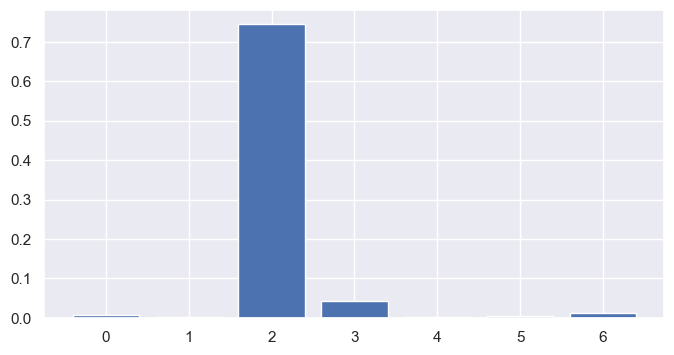

In [39]:
pipeMLP.fit(X_train, y_train)

importance = permutation_importance(pipeMLP, X_train, y_train, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

Feature 2 - Type

#**Ejercicio-10.**
Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras. 

In [40]:
modeloRF = RandomForestRegressor(max_depth=3,min_samples_split=2,ccp_alpha=0.1)

pipeRF = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modeloRF)]) 
kfoldRF = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)  

ParamsRF = {'model__max_depth':[3,4,5],
            'model__min_samples_split':[3,4,5],
            'model__ccp_alpha':[0.01, 0.1, 0.5]}

In [41]:
GridRF = GridSearchCV(pipeRF,
                        param_grid = ParamsRF,
                        cv=kfoldRF,
                        scoring=make_scorer(mi_MAPE),
                        n_jobs=-1)

GridRF.fit(X_train, np.ravel(y_train))
best_score = GridRF.best_score_
best_param = GridRF.best_params_

print("Best score:", best_score)
print("Best param:", best_param)

Best score: 100.60331401064578
Best param: {'model__ccp_alpha': 0.1, 'model__max_depth': 3, 'model__min_samples_split': 3}


In [42]:
modeloRF = RandomForestRegressor(max_depth=3,min_samples_split=3,ccp_alpha=0.1)

Feature: 0, Score: 0.00283
Feature: 1, Score: 0.07761
Feature: 2, Score: 0.87740
Feature: 3, Score: 0.11125
Feature: 4, Score: 0.01339
Feature: 5, Score: -0.00002
Feature: 6, Score: 0.00094


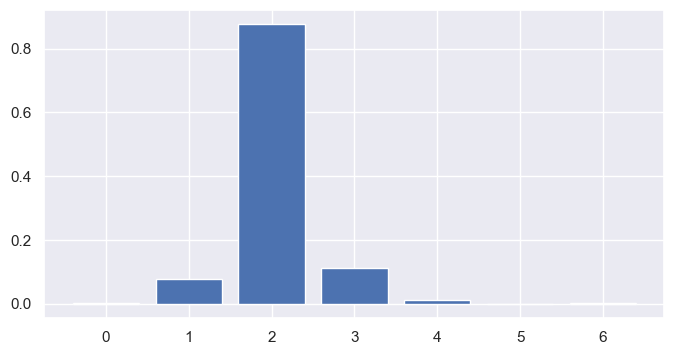

In [43]:
pipeMLP.fit(X_test, y_test)

importance = permutation_importance(pipeMLP, X_test, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-11.**

In [44]:
modeloLR = LinearRegression()

pipeRL = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modeloLR)]) 

Feature: 0, Score: 0.00171
Feature: 1, Score: 0.06322
Feature: 2, Score: 0.90898
Feature: 3, Score: 0.13056
Feature: 4, Score: 0.00834
Feature: 5, Score: 0.00008
Feature: 6, Score: 0.00618


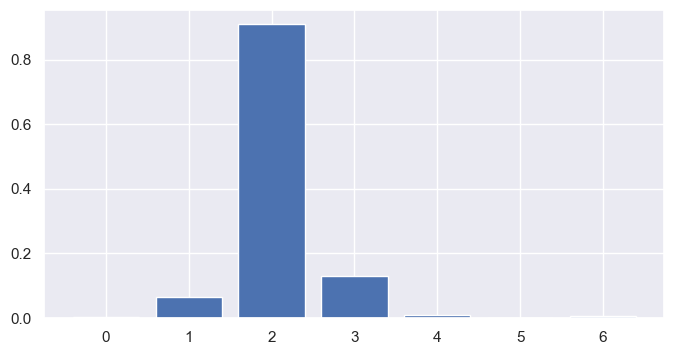

In [45]:
pipeRL.fit(X_test, y_test)

importance = permutation_importance(pipeRL, X_test, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-12.**
12. Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con 
respecto a MAPE. Incluye tus conclusiones finales de la actividad. 

El MAPE es el error porcentual absoluto medio el cual señala la precisión con la que un modelo tiene la capacidad de predecir los valores de una variable dependiente (Y). Para el caso del estudio, los autores obtuvieron un valor del 27% indicando que, el modelo podrá generar pronóticos razonables para la variable explicada. Con respecto a nuestros hallazgos, obtuvimos un MAPE del 110% lo que muestra una deficiencia en el entrenamiento del modelo y, por ende, pronosticará de forma inadecuada la variable LPE del estudio analizado.

Por su parte, para el estudio de los autores, se encontró que el most relevant feature para el modelo fue la variable Type con un valor del 36%. Lo anterior va en la misma vía respecto a nuestros resultados dado que econtramos que el importance feature fue la vaible Type; sin embargo, para el modelo MLP fue de 3, 869%, el Random Forest obtuvo un Type de 81,96% y el Regresión Múltiple fue de 85,10% siendo éste último el que mayor relevancia obtuvo para Type.

Por último, comparando los valores obtenidos en el punto 6 para RMSE, MAE y MAPE, se observa que los resultados para los datos de Prueba son mayores que los de Entrenamiento sólo que no tienen una diferencia considerable entre ellos, por lo que el modelo no presentaría sobreentrenamiento o subentrenamiento dado que las cifras convergen entre ellas.

###**Fin de la Actividad de la semana 7.**